In [18]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [19]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

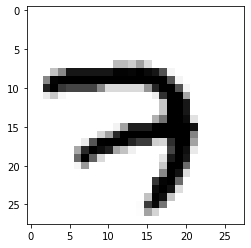

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(array([3], dtype=int64),)


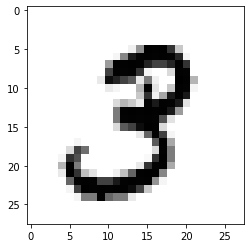

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(array([4], dtype=int64),)


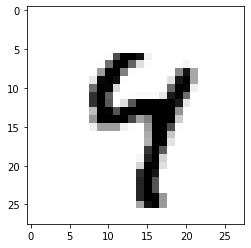

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(array([6], dtype=int64),)


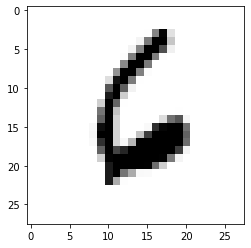

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
(array([1], dtype=int64),)


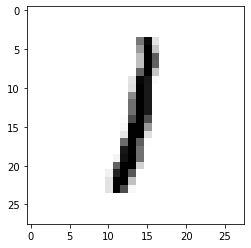

In [46]:
import matplotlib.pyplot as plt 

print(mnist.train.images[0])

for i in range(5):
    print(mnist.train.labels[i])
    print(np.where(mnist.train.labels[i] == 1))
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='Greys')
    plt.show()

In [49]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,
                                                             labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finished") 
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy of Train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images,
                                                             Y:mnist.train.labels})))    
    print("Accuracy of Test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                             Y:mnist.test.labels})))

Epoch: 1, Cost: 4.727065280350766
Epoch: 2, Cost: 1.698667001507499
Epoch: 3, Cost: 1.1483981081572452
Epoch: 4, Cost: 0.9078232213041997
Epoch: 5, Cost: 0.7718652910265056
Epoch: 6, Cost: 0.6827141064676373
Epoch: 7, Cost: 0.620455628227104
Epoch: 8, Cost: 0.5736296379837125
Epoch: 9, Cost: 0.5370269789208068
Epoch: 10, Cost: 0.5082161799344148
Epoch: 11, Cost: 0.4848425345258275
Epoch: 12, Cost: 0.46401488015597514
Epoch: 13, Cost: 0.4471705083278095
Epoch: 14, Cost: 0.43228199208324636
Epoch: 15, Cost: 0.41859397964044026
Learning Finished
Accuracy of Train data: 0.8972545266151428
Accuracy of Test data: 0.8962000012397766


In [64]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,
                                                             labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finished") 
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy of Train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images,
                                                             Y:mnist.train.labels})))    
    print("Accuracy of Test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                             Y:mnist.test.labels})))

Epoch: 1, Cost: 189.54174116308045
Epoch: 2, Cost: 43.991260627399754
Epoch: 3, Cost: 27.21935852657666
Epoch: 4, Cost: 19.023088424238303
Epoch: 5, Cost: 13.852413332733242
Epoch: 6, Cost: 10.475347932830651
Epoch: 7, Cost: 7.8492381465421905
Epoch: 8, Cost: 5.98919808383951
Epoch: 9, Cost: 4.375633660907526
Epoch: 10, Cost: 3.3623185904581385
Epoch: 11, Cost: 2.518108296149338
Epoch: 12, Cost: 1.8926868370059693
Epoch: 13, Cost: 1.4907300722891266
Epoch: 14, Cost: 1.1446266299950818
Epoch: 15, Cost: 0.8507634686286544
Learning Finished
Accuracy of Train data: 0.9885454773902893
Accuracy of Test data: 0.9449999928474426


In [67]:
mnist.test.images[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
from PIL import Image
im = Image.open("mywriten_nine.png")
pixel = np.array(im)
im

In [95]:
im1 = Image.open("mywriten_two.png")
pixel1 = np.array(im1)
im1

In [96]:
mytestimg1 = 1 - pixel1[:,:,0]/255
mytestimg1 = mytestimg1.reshape(1,784)
mytestimg1.shape

(1, 784)

In [97]:
mytestimg = 1 - pixel[:,:,0]/255
mytestimg = mytestimg.reshape(1,784)
mytestimg.shape

(1, 784)

In [98]:
mytestimg = np.append(mytestimg, mytestimg1, axis=0)
mytestimg.shape

(2, 784)

In [100]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,
                                                             labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs, Y:batch_ys}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch
        print("Epoch: {}, Cost: {}".format(epoch+1, avg_cost))
    print("Learning Finished") 
    
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy of Train data: {}".format(sess.run(accuracy, feed_dict={X:mnist.train.images,
                                                             Y:mnist.train.labels})))    
    print("Accuracy of Test data: {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images,
                                                             Y:mnist.test.labels})))
    pred = sess.run(hypothesis, feed_dict={X:mytestimg})
    print("Prediction of my data: {}".format(pred))    

Epoch: 1, Cost: 185.69407507462932
Epoch: 2, Cost: 42.16209004835651
Epoch: 3, Cost: 26.293135814666773
Epoch: 4, Cost: 18.26936014175413
Epoch: 5, Cost: 13.398163620851236
Epoch: 6, Cost: 9.769514414568112
Epoch: 7, Cost: 7.300907612484915
Epoch: 8, Cost: 5.563262821516981
Epoch: 9, Cost: 4.056482197310002
Epoch: 10, Cost: 3.0849216893261655
Epoch: 11, Cost: 2.3988932730928685
Epoch: 12, Cost: 1.7791160162321638
Epoch: 13, Cost: 1.286740895804215
Epoch: 14, Cost: 1.058587744555308
Epoch: 15, Cost: 0.802819458146253
Learning Finished
Accuracy of Train data: 0.9908727407455444
Accuracy of Test data: 0.9480000138282776
Prediction of my data: [[-559.90234  528.5861   666.5714   207.51257  388.19794 -262.10297
   726.90985  227.1732  1260.29     585.3342 ]
 [ -35.27648 -264.01407  620.9765   365.54935 -404.4333   421.06424
   320.62085  248.73216 -143.01254 -559.6604 ]]


     cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.089726  0.589872  0.000000  0.652556      0.000000   0.496512  0.387607   
1  0.152740  0.117418  0.621189  0.291534      0.335404   0.813372  0.507275   
2  0.337900  0.000000  0.478261  0.523962      0.170807   0.453198  0.670346   
3  0.374429  0.317195  0.000000  0.848243      0.000000   0.380814  0.190667   
4  0.120548  0.510295  0.000000  0.571086      0.282609   0.716279  0.257652   
5  0.349315  0.000000  0.000000  0.560703      0.000000   0.258140  0.880582   
6  0.147945  0.696160  0.000000  0.652556      0.000000   0.507558  0.247366   
7  0.341096  0.000000  0.591204  0.532748      0.198758   0.661047  0.410687   
8  0.442922  0.000000  0.000000  0.560703      0.000000   0.825581  0.429002   
9  0.121005  0.511964  0.714643  0.576677      0.279503   0.229651  0.263422   

        age  
0  0.074176  
1  0.035714  
2  0.074176  
3  0.074176  
4  0.074176  
5  0.244505  
6  0.016484  
7  0.15

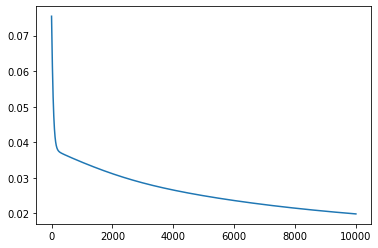

0.019836912621273062


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("./concrete.csv", sep=",", header=0)
data

def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df

feture_scaling(data,column=["cement","slag","ash","water","superplastic","coarseagg","fineagg","age","strength"])
data.head

# Neural Network

x_data = data[["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]]
print(x_data[0:10])
print(x_data.shape)
y_data = data[["strength"]]
print(y_data[:10])
print(y_data.shape)

num_node = 10
num_layer = 2
learn_rate = 0.01

W_ = []
b_ = []
layer_ = []

X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([8,num_node]), name='weight')
b1 = tf.Variable(tf.random_normal([num_node]), name='bias')
layer1 = tf.matmul(X,W1) + b1

W_.append(W1)
b_.append(b1)
layer_.append(layer1)

for i in range(1, num_layer):
    W_.append(tf.Variable(tf.random_normal([num_node,num_node]), name='weight'))
    b_.append(tf.Variable(tf.random_normal([num_node]), name='bias'))
    layer_.append(tf.sigmoid(tf.matmul(layer_[i-1], W_[i]) + b_[i]))

W_last = tf.Variable(tf.random_normal([num_node,1]), name='weight')
b_last = tf.Variable(tf.random_normal([1]), name='bias')

Y_hat = tf.sigmoid(tf.matmul(layer_[-1], W_last) + b_last)
loss = tf.reduce_mean(tf.square(Y - Y_hat))
#loss = tf.reduce_mean(-tf.reduce_mean(Y * tf.log(Y_hat), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learn_rate)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_history = []
    for step in range(10001):
        cost_val, hypothesis, _ = sess.run([loss, Y_hat, train], feed_dict={X:x_data, Y:y_data}) # 연산그래프 실행할 때 변수 값을 넣음
        cost_history.append(cost_val)
        if step % 2000 == 0:
            print(step, cost_val)
    plt.plot(cost_history)
    plt.show()
    
    pred = sess.run(Y_hat, feed_dict={X:x_data})
    print(np.cov(np.array(y_data).reshape(-1), np.array(pred).reshape(-1))[0][1])

In [ ]:
5.94478890535934e-05